## 0. Installation

In this section we will deal with maps and projections, using packages that are not part of the standard anaconda (or Enthought) Python distributions. You will need to install these packages:

- Basemap
- pyproj
- Shapely

Other packages you may want to look at include

- Fiona
- rasterio
- geopandas
- Cartopy

On anaconda, you can use the `conda install <package>` command.  Many of these particular packages are not available for all operating systems, but the [IOOS anaconda channel](https://conda.anaconda.org/ioos) has most of the packages that geoscientists may want on multple system architechures. Install these packages using the command:

    conda install --channel IOOS <package>

You can also put in the full URL (https://conda.anaconda.org/ioos) in place of the bookmark IOOS.
   

## 1. Introduction

Maps are a way to present information on a (roughly) spherical earth on a flat plane, like a page or a screen. Here are two examples of common map projections. The projection is only accurate in the region where the plane touches the sphere, and is less accurate as the distance between the plane and the sphere increases.

#### Mercator
![Mercator](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Usgs_map_mercator.svg/413px-Usgs_map_mercator.svg.png)

#### Lambert conformal conic
![Lambert conformal conic](https://upload.wikimedia.org/wikipedia/commons/d/da/USGS_map_Albers_conic_tall.gif)

You can read more about map projections from [_Map Projections – a Working Manual_](http://pubs.usgs.gov/pp/1395/report.pdf), the source of the images above, or, more entertainingly, from [XKCD](https://xkcd.com/977/).

Let's make our own map with the Basemap package.


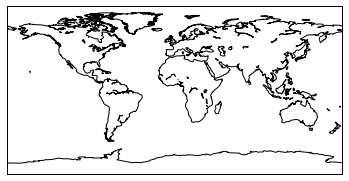

In [202]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap

m = Basemap()    # Create a map instance. The default will give us the most boring map projection of all.

m.drawcoastlines()
# m.fillcontinents()


`basemap` provides a number of projections, but these require more information be input when the map class is instantiated. Available projections are:

    omerc            Oblique Mercator                        
    geos             Geostationary                           
    robin            Robinson                                
    npstere          North-Polar Stereographic               
    laea             Lambert Azimuthal Equal Area            
    stere            Stereographic                           
    nplaea           North-Polar Lambert Azimuthal           
    spstere          South-Polar Stereographic               
    aeqd             Azimuthal Equidistant                   
    eqdc             Equidistant Conic                       
    npaeqd           North-Polar Azimuthal Equidistant       
    spaeqd           South-Polar Azimuthal Equidistant       
    aea              Albers Equal Area                       
    kav7             Kavrayskiy VII                          
    merc             Mercator                                
    rotpole          Rotated Pole                            
    tmerc            Transverse Mercator                     
    cea              Cylindrical Equal Area                  
    sinu             Sinusoidal                              
    eck4             Eckert IV                               
    mill             Miller Cylindrical                      
    cass             Cassini-Soldner                         
    gnom             Gnomonic                                
    moll             Mollweide                               
    hammer           Hammer                                  
    mbtfpq           McBryde-Thomas Flat-Polar Quartic       
    nsper            Near-Sided Perspective                  
    splaea           South-Polar Lambert Azimuthal           
    ortho            Orthographic                            
    lcc              Lambert Conformal                       
    cyl              Cylindrical Equidistant                 
    poly             Polyconic                               
    vandg            van der Grinten                         
    gall             Gall Stereographic Cylindrical   

Lambert Conformal Conic (lcc) is a useful projection in numerical modeling because it preserves right angles. Let's make a map of the Gulf of Mexico using the `lcc` projection. For most projections that do not include the whole earth, the upper right corner (lat and lon) and lower left corner (lat and lon) need to be specified.


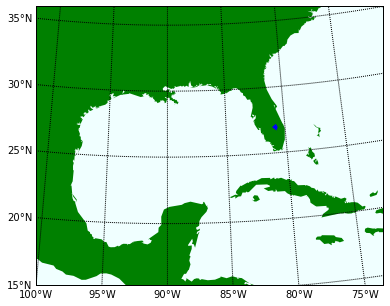

In [203]:
m = Basemap(projection='lcc',
            urcrnrlat=35.0,
            urcrnrlon=-70.0,
            llcrnrlat=15.0,
            llcrnrlon=-100.0,
            lat_0=20.0,       # These three argumetns are specific to the projection. 
            lat_1=30.0,       # They specify the two latitudes where the cone intersects the sphere.
            lon_0=-90.0,      # and the centeral longitude.
            resolution='l')   # This specifies the resolutoin of the coastline. 'i' is 'intermediate', 'l' is 'low'.

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, axis_bgcolor='azure')

m.fillcontinents(color='green', lake_color='blue')
m.drawmeridians(np.arange(-100, -65, 5), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(15, 40, 5), labels=[1, 0, 0, 0])
# m.drawrivers(color='darkblue')  # this one is slow...
plt.draw()

The map is actually plotted in a 'projected' coordinate system, with units in meters. We can see this by looking at the limits of the two axes:

In [204]:
ax.get_xlim(), ax.get_ylim()

((0.0, 2928272.752744426), (0.0, 2354085.821754016))

It is possible to go back and forth between projected and earth coordinates by calling the map instance as a function, like

In [205]:
# College Station: 30°36′05″N 96°18′52″W
lat_cll = 30.0 + 36.0/60.0 + 5.0/3600.0
lon_cll = -(96.0 + 18.0/60.0 + 52.0/3600.0)

x_cll, y_cll = m(lon_cll, lat_cll)  # the defualt is to go from earth coords to projected coords
print('Location of college station in projected coordinates: x=', x_cll,' y=', y_cll)

# find the lat/lon for the midpoint of the map,
x_mean = np.mean(ax.get_xlim())
y_mean = np.mean(ax.get_ylim())
lon_mean, lat_mean = m(x_mean, y_mean, inverse=True)   # use inverse=True to go from projected coords to earth coords.
print('Location of map center in earth coordinates: latitude=, ', lat_mean, 'longitude=', lon_mean)

Location of college station in projected coordinates: x= 504677.4354942114  y= 1721728.077699063
Location of map center in earth coordinates: latitude=,  25.806962640490607 longitude= -86.45869532707718


_Remember: when plotting on the map, you need to use projected coordinates_

---
### _Exercise_

> Plot the location of College Station on the map above with a red dot

---

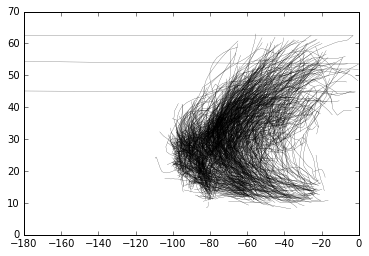

In [182]:
from pykml import parser
from zipfile import ZipFile

kmz = ZipFile('Atlantic Hurricanes.kmz', 'r')
kml = kmz.open('doc.kml', 'r')

hurricanes = parser.fromstring(kml.read())

tracks = []
for decade in range(len(hurricanes.Document.Folder.Folder)):
    doc = hurricanes.Document.Folder.Folder[decade]
    try:
        for storm in range(len(doc.Document.Placemark)):
            track_text = hurricanes.Document.Folder.Folder[decade].Document.Placemark[storm].LineString.coordinates.text
            track = []
            for location in track_text.split():
                track.append(np.fromstring(location, sep=','))
            tracks.append(np.array(track)[:, :2])
    except:
        pass  # there is more recent data to be had here... Perhaps a good homework topic.

            
for track in tracks:
    plt.plot(track[:, 0], track[:, 1], '-k', lw=0.2)

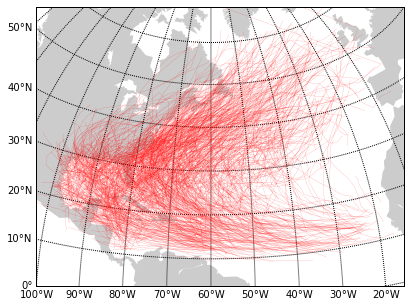

In [181]:
m = Basemap(projection='laea',
            urcrnrlat=50.0,
            urcrnrlon=20.0,
            llcrnrlat=0.0,
            llcrnrlon=-100.0,
            lat_0=20.0,       # These three argumetns are specific to the projection. 
            lat_1=40.0,       # They specify the two latitudes where the cone intersects the sphere.
            lon_0=-60.0,      # and the centeral longitude.
            resolution='c')   # This specifies the resolutoin of the coastline. 'i' is 'intermediate', 'l' is 'low'.

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

m.fillcontinents(color='0.8')
m.drawmeridians(np.arange(-180, 0, 10), labels=[0, 0, 0, 1])
m.drawparallels(np.arange(0, 90, 10), labels=[1, 0, 0, 0])

for track in tracks:
    x, y = m(track[:, 0], track[:, 1])    # convert to projected coordinates
    ax.plot(x, y, '-r', lw=0.1)

plt.draw()

## Projections

At the heart of basemap is the `proj4` library. This is a very powerful library that can do a number of different projections using a wide variety of models for the shape of the earth (a 'Geoid'). We can access this library directly using `pyproj`.

For example, the proj4 command for the Gnomonic projection is

      +proj=gnom  +lat_0=Latitude at projection center 
              +lon_0=Longitude at projection center
              +x_0=False Easting
              +y_0=False Northing

`pyproj.Proj` uses these same keyword arguments.

In [209]:
import pyproj

# three projections that can be called like the basemap instance to transform (they just don't plot)
proj1 = pyproj.Proj(proj='gnom', lat_0=40, lon_0=-80, datum='NAD27')   # similar to Basemap
proj2 = pyproj.Proj(init='epsg:26915')                                 # EPSG projects are standardized
proj3 = pyproj.Proj(proj='latlong',datum='WGS84')                      # Boring old lat/lon with a new geoid.

# Transformation directly between two projections is like this:
x1, y1 = proj1(lon_cll, lat_cll)   # location of College Station, from above
x2, y2 = pyproj.transform(proj1, proj2, x1, y1)
print(x2, y2)


182166.20344930107 3390132.805590975


You can extract the projection from a basemap that is a 'proj4 string', that can be used as an argument to `pyproj.Proj`, and is a standard way to specify projection information.

In [211]:
p4s = m.proj4string
pyproj.Proj(p4s)
print(p4s)

+lat_0=20.0 +lat_1=30.0 +y_0=520707.371639078 +lat_2=30.0 +R=6370997.0 +units=m +x_0=1108752.4348443965 +lon_0=-90.0 +proj=lcc 
